1600
[0.000e+00 1.000e+00 2.000e+00 ... 1.597e+03 1.598e+03 1.599e+03]
1.4492317400000072
1600


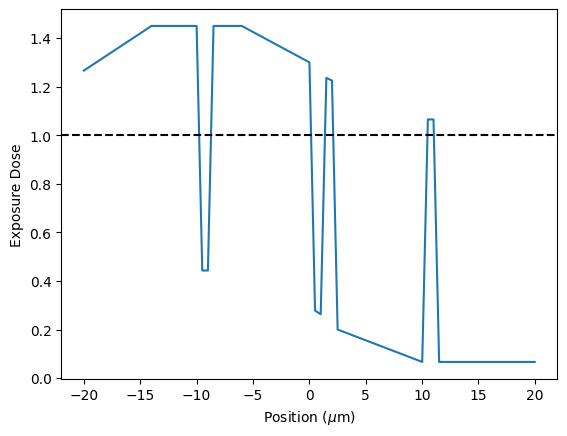

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
from scipy.signal import convolve2d

min_pix_size = 25 #Adress size
width = 40000 #nanometers
pix_width = width/min_pix_size
pix_width = int(pix_width)
print(pix_width)


RT = 1 # Resist Threshold 
pixels = np.linspace(0,pix_width-1,pix_width)

micro_meter = pixels *25/1000
D = np.zeros(pix_width) #Dose
print(pixels)
D[0] = 1.266


# Defining uncorrected dose profile

for i in range(pix_width):
    if i < 240:
        D[i+1] = D[i]+ 0.00076666
    if 239 < i < 400:
        D[i+1] = D[i]
    if 399 < i < 420:
        D[i+1] = D[i]-0.05035
    if 419 < i < 440:
        D[i+1] = D[i]
    if 439 < i < 460:
        D[i+1] = D[i]+0.05035
    if 459 < i < 560:
        D[i+1] = D[i] 
    if 559 < i < 800:
        D[i+1] = D[i]-0.000625
    if 799 < i < 820:
        D[i+1] = D[i]-0.0511
    if 819 < i < 840:  
        D[i+1] = D[i]-0.00075
    if 839 < i < 860:
        D[i+1] = D[i]+0.04865
    if 859 < i < 880:    
        D[i+1] = D[i]-0.00055
    if 879 < i < 900:
       D[i+1] = D[i]-0.05125
    if 899 < i < 1200:
        D[i+1] = D[i]-0.0004445
    if 1199 < i < 1220:
        D[i+1] = D[i]+0.04992
    if 1219 < i < 1240:
        D[i+1] = D[i]
    if 1239 < i < 1260:
        D[i+1] = D[i]-0.04992
    if 1259 < i < 1599:
        D[i+1] = D[1260]
        
print(D[239])
l = (width-1)/1000
micrometer_centered = np.linspace(-l/2,l/2,pix_width)

plt.plot(micrometer_centered,D)
plt.axhline(y = 1.0, color = 'black', linestyle = '--') 
plt.xlabel('Position $(\mu$m)')
plt.ylabel('Exposure Dose')
plt.savefig('Uncorrected Dose.png')
#PB = (eta/sigma_b**2) * np.exp(-np.abs(r**2)/sigma_b**2)



print(D.shape[0])


Text(0, 0.5, 'Masked exposure Dose')

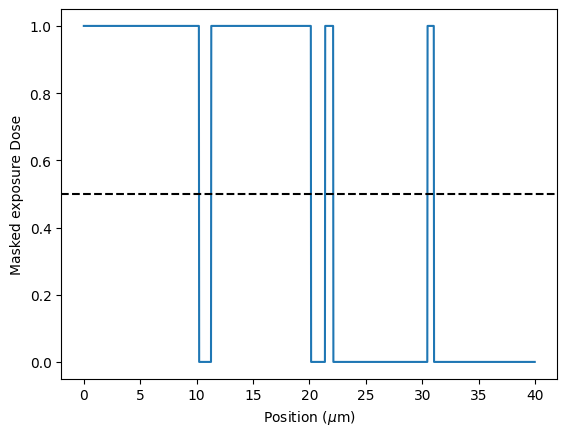

In [7]:
for i in range(pix_width):
    a = D[i]
    if a < 1:
        D[i] = 0
    else:
        D[i] = 1

plt.plot(micro_meter,D)
plt.axhline(y = 0.5, color = 'black', linestyle = '--') 
plt.xlabel('Position $(\mu$m)')
plt.ylabel('Masked exposure Dose')


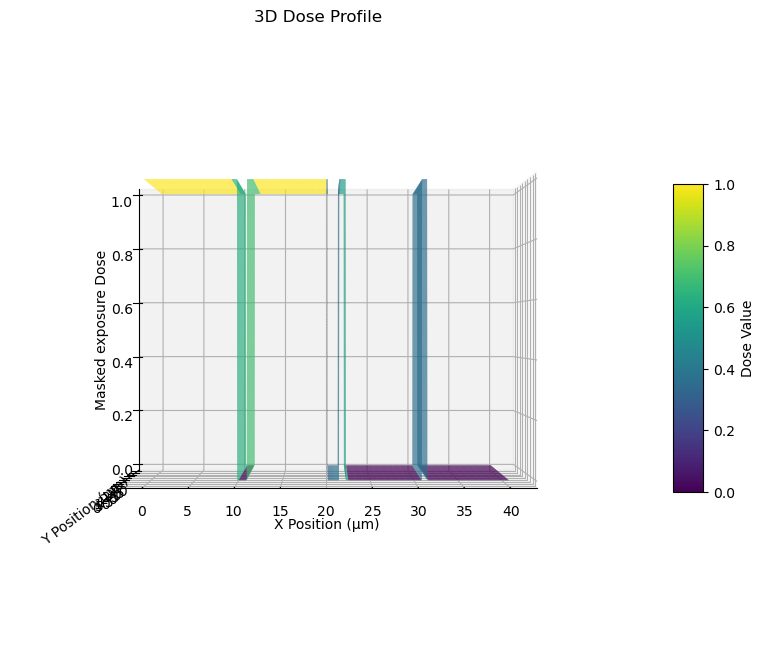

In [8]:
# Defining 2D uncorrected dose profile

min_pix_size = 25  # Address size
width = 40000  # Nanometers
depth = 40000  # Nanometers (arbitrary depth chosen)
pix_width = int(width / min_pix_size)
pix_depth = int(depth/ min_pix_size)

RT = 1  # Resist Threshold
D = np.zeros((pix_depth, pix_width))  # 2D dose array

# Initialize the first row dose profile (similar to the 1D case)
D[0, 0] = 1.266
for i in range(pix_width):
    if i < 240:
        D[0, i + 1] = D[0, i] + 0.00076666
    if 239 < i < 400:
        D[0, i + 1] = D[0, i]
    if 399 < i < 420:
        D[0, i + 1] = D[0, i] - 0.05035
    if 419 < i < 440:
        D[0, i + 1] = D[0, i]
    if 439 < i < 460:
        D[0, i + 1] = D[0, i] + 0.05035
    if 459 < i < 560:
        D[0, i + 1] = D[0, i]
    if 559 < i < 800:
        D[0, i + 1] = D[0, i] - 0.000625
    if 799 < i < 820:
        D[0, i + 1] = D[0, i] - 0.0511
    if 819 < i < 840:
        D[0, i + 1] = D[0, i] - 0.00075
    if 839 < i < 860:
        D[0, i + 1] = D[0, i] + 0.04865
    if 859 < i < 880:
        D[0, i + 1] = D[0, i] - 0.00055
    if 879 < i < 900:
        D[0, i + 1] = D[0, i] - 0.05125
    if 899 < i < 1200:
        D[0, i + 1] = D[0, i] - 0.0004445
    if 1199 < i < 1220:
        D[0, i + 1] = D[0, i] + 0.04992
    if 1219 < i < 1240:
        D[0, i + 1] = D[0, i]
    if 1239 < i < 1260:
        D[0, i + 1] = D[0, i] - 0.04992
    if 1259 < i < 1599:
        D[0, i + 1] = D[0, 1260]


# Extending the dose profile along the second dimension
for j in range(1, pix_depth):
    D[j, :] = D[0, :]

#Changing profile so values are 1 for a feature and zero for elsewhere 
for i in range(pix_width):
    for j in range(pix_depth):
        a = D[j,i]
        if a < 1:
            D[j,i] = 0
        else:
            D[j,i] = 1

# Generate a 2D grid for the x and y axes
x = np.linspace(0, width / 1000, pix_width)  # x-axis in micrometers
y = np.linspace(0, depth / 1000, pix_depth)  # y-axis in micrometers
X, Y = np.meshgrid(x, y)

# Plot the 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, D, cmap = 'viridis', edgecolor='none')

# Add labels and colorbar
ax.set_xlabel('X Position (μm)')
ax.set_ylabel('Y Position (μm)')
ax.set_zlabel('Masked exposure Dose')
ax.view_init(elev=0., azim=270)
ax.set_title('3D Dose Profile')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Dose Value')

# Show the plot
plt.show()


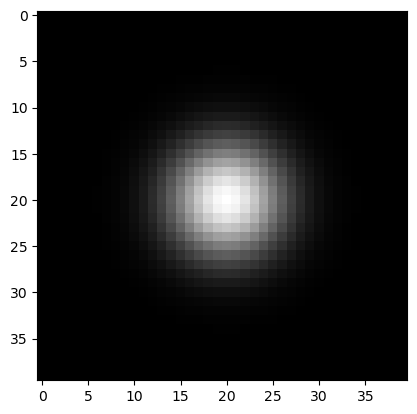

<Figure size 640x480 with 0 Axes>

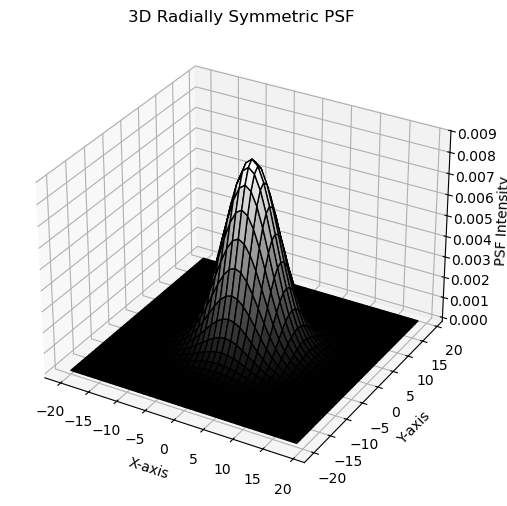

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
# Parameters for the Gaussian
mean = 0   # Center (x, y) at origin
eta = 0.5  #@50 keV on si
sigma_b = 6 #@50 keV on si        

#2D Gaussian Kernel 
limit = 20
x1 = np.linspace(-limit, limit, pix_width)  # x-axis in micrometers
y1 = np.linspace(-limit, limit, pix_width) 
size = 40
PSF_kernel = np.zeros((size,size))

for x1 in range(size):
    for y1 in range(size):
        value = (eta/sigma_b**2) * np.exp(-((x1-size//2)**2 + (y1-size//2)**2)/(sigma_b**2))
        PSF_kernel[x1,y1] = value
PSF_kernel = PSF_kernel /PSF_kernel.sum()
plt.imshow(PSF_kernel,cmap = 'gray')
plt.show()
plt.figure()

# Plot the 3D surface
X,Y = np.meshgrid(np.arange(-size/2,size/2), np.arange(-size/2,size/2))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, PSF_kernel, cmap='grey',edgecolor='black')

# Customize the plot
ax.set_title('3D Radially Symmetric PSF')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('PSF Intensity')
plt.show()
plt.figure()

#log_r = np.log(r)
#plt.plot(log_r,PB)
#plt.xlabel('Radius $(\mu$m)')
#plt.ylabel('PSF')


In [40]:
#Non fft convolution method (takes too long)

import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt

mask = np.where(D == 0)

D_corr = D.copy()

iterations = 5
for j in range(iterations):

    #Determining the scattered dose 
    convolution = convolve2d(D_corr, PSF_kernel, mode='same')
    
    #Correcting the dose using formula from Watson paper 
    D_corr = 2 * (1-convolution)
    
    D_corr[mask] = 0
    
    print(j)



0
1
2
3
4


<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sm/89rv8yy96bscxt0tyvc5xpjm0000gn/T/ipykernel_14225/400151208.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Position $(\mu$m)')


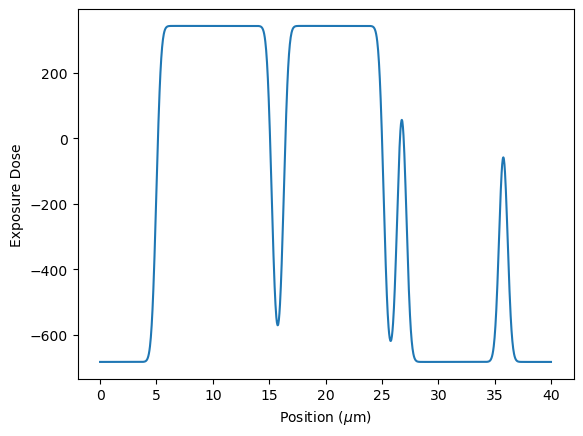

In [76]:
D_slice = D_corr[0,:]
plt.plot(micro_meter,D_slice)
#plt.axhline(y = 1.0, color = 'black', linestyle = '--') 
plt.xlabel('Position $(\mu$m)')
plt.ylabel('Exposure Dose')
plt.savefig('Uncorrected Dose.png')

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (100, 100) and arg 2 with shape (1600, 1600).

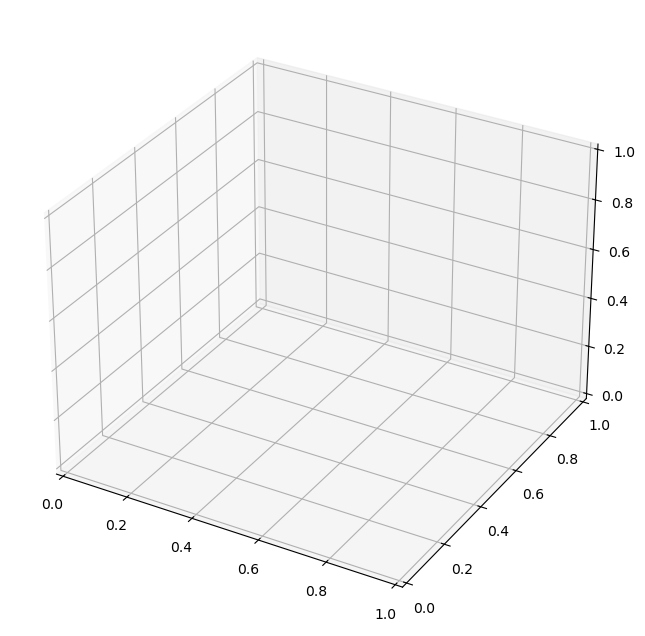

In [72]:
X,Y = np.meshgrid(x,y)

# Plot the 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, D_corr, cmap = 'viridis', edgecolor='none')

# Add labels and colorbar
ax.set_xlabel('X Position (μm)')
#ax.set_xlim(-20,20)
#ax.set_ylim(-20,20)
ax.set_ylabel('Y Position (μm)')
ax.set_zlabel('Exposure Dose')
ax.view_init(elev=0., azim=270)
ax.set_title('3D Dose Profile')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Dose Value')

# Show the plot
plt.show()

0
1
2
3


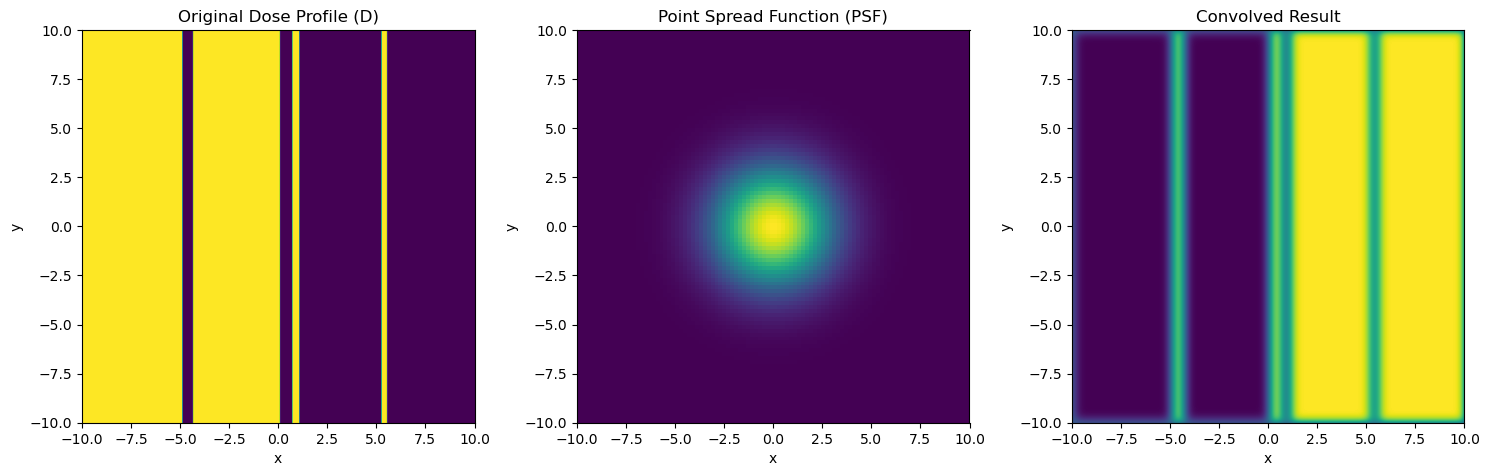

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve

# Step 1: Define the 2D PSF
def point_spread_function_2d(x, y, sigma):
    """2D Gaussian PSF with standard deviation sigma"""
    return (eta/sigma_b**2) * np.exp(-(x**2 + y**2)/(sigma_b**2))

# Step 2: Create the 2D domain and discretize
grid_size = 100  # Define grid size
x = np.linspace(-20, 20, grid_size)
y = np.linspace(-20, 20, grid_size)
X, Y = np.meshgrid(x, y)  # Create 2D grid


psf_2d = point_spread_function_2d(X, Y, sigma_b)

# Normalize the 2D PSF
psf_2d /= np.sum(psf_2d)

# Step 3: Define the 2D dose profile (example)

# Step 4: Perform the 2D convolution
D_corr = D.copy()
mask = np.where(D == 0)

iterations = 4
for j in range(iterations):
    
    #Determining the scattered dose 
    convolved_result = fftconvolve(D_corr, psf_2d, mode='same')
    
    #Correcting the dose using formula from Watson paper 
    D_corr = 2 * (1-convolved_result)
    
    #D_corr[mask] = 0
    
    print(j)
    


# Step 5: Plot the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the dose profile
axes[0].imshow(D, extent=(-10, 10, -10, 10), origin='lower', cmap='viridis')
axes[0].set_title("Original Dose Profile (D)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

# Plot the PSF
axes[1].imshow(psf_2d, extent=(-10, 10, -10, 10), origin='lower', cmap='viridis')
axes[1].set_title("Point Spread Function (PSF)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")

# Plot the convolved result
axes[2].imshow(convolved_result, extent=(-10, 10, -10, 10), origin='lower', cmap='viridis')
axes[2].set_title("Convolved Result")
axes[2].set_xlabel("x")
axes[2].set_ylabel("y")

plt.tight_layout()
plt.show()


<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sm/89rv8yy96bscxt0tyvc5xpjm0000gn/T/ipykernel_14225/4027060129.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Position $(\mu$m)')


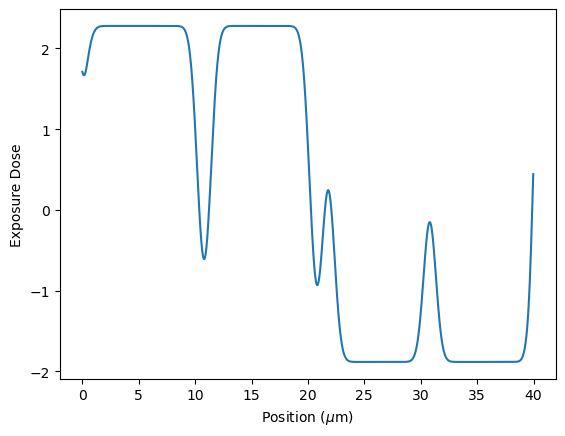

In [68]:
D_slice = D_corr[0,:]
            
plt.plot(micro_meter,D_slice)
#plt.axhline(y = 1.0, color = 'black', linestyle = '--') 
plt.xlabel('Position $(\mu$m)')
plt.ylabel('Exposure Dose')
plt.savefig('Uncorrected Dose.png')

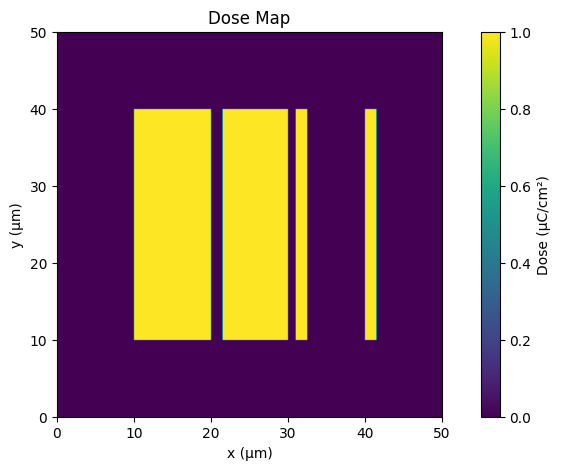

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the grid dimensions
grid_size = (1000, 2000)  # Pixels
dose_map = np.zeros(grid_size)  # Initialize the dose map with zeros

# Conversion factor: microns to pixels
x_extent = 50 # Micron extent in the x-direction
pixel_per_micron = grid_size[1] / x_extent  # Pixels per micron

# Helper function to convert microns to pixel indices
def microns_to_pixels(start_micron, end_micron):
    start_pixel = int(start_micron * pixel_per_micron)
    end_pixel = int(end_micron * pixel_per_micron)
    return start_pixel, end_pixel

# Step 2: Define regions with different dose values
# Box 1: x 10–30 µm
x_start, x_end = microns_to_pixels(10, 20)
dose_map[200:800, x_start:x_end] = 1.0  # Assign dose value 1.0

# Box 2: x 30.5–51 µm
x_start, x_end = microns_to_pixels(21.5, 30)
dose_map[200:800, x_start:x_end] = 1.0  # Assign dose value 1.0

# Box 3 (Thin): x 51.5–55 µm
x_start, x_end = microns_to_pixels(31, 32.5)
dose_map[200:800, x_start:x_end] = 1.0  # Assign dose value 1.0

# Box 4 (Thin): x 80–82.5 µm
x_start, x_end = microns_to_pixels(40, 41.5)
dose_map[200:800, x_start:x_end] = 1.0  # Assign dose value 1.0

# Step 3: Visualize the dose map
plt.figure(figsize=(10, 5))
plt.imshow(dose_map, cmap='viridis', extent=[0, x_extent, 0, 50])  # Set extent in microns
plt.colorbar(label='Dose (μC/cm²)')
plt.xlabel('x (µm)')
plt.ylabel('y (µm)')
plt.title('Dose Map')
plt.show()


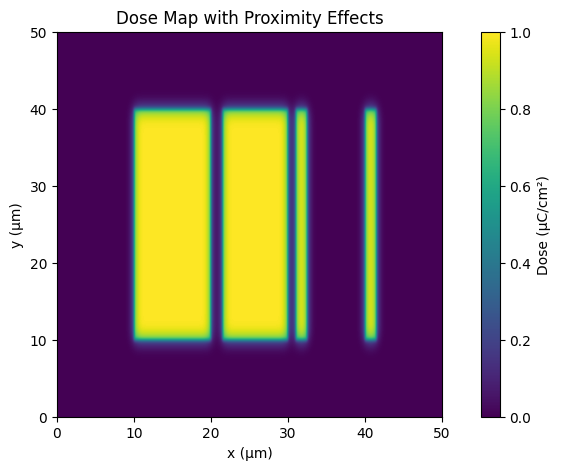

In [19]:
from scipy.ndimage import gaussian_filter

# Step 4: Simulate proximity effects with Gaussian kernels
# Define scattering parameters
sigma_short = 5  # Short-range scatter (in pixels, tune as needed)
sigma_long = 20  # Long-range scatter (in pixels, tune as needed)

# Apply Gaussian filters for short-range and long-range scattering
dose_short_range = gaussian_filter(dose_map, sigma=sigma_short)
dose_long_range = gaussian_filter(dose_map, sigma=sigma_long)

# Combine the effects
eta = 0.5  # Weighting factor for long-range scatter (can be tuned)
dose_with_scatter = (1 - eta) * dose_short_range + eta * dose_long_range

# Step 5: Visualize the scattered dose map
plt.figure(figsize=(10, 5))
plt.imshow(dose_with_scatter, cmap='viridis', extent=[0, x_extent, 0, 50])  # Use same extents
plt.colorbar(label='Dose (μC/cm²)')
plt.xlabel('x (µm)')
plt.ylabel('y (µm)')
plt.title('Dose Map with Proximity Effects')
plt.show()


Did not converge within the maximum number of iterations.


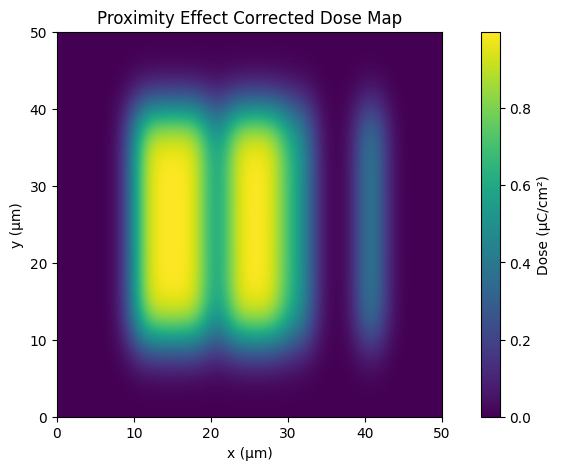

In [20]:
from scipy.ndimage import gaussian_filter

# Step 6: Define parameters for correction
clearing_dose = 1.0  # Clearing dose threshold
sigma_long = 20  # Long-range scatter Gaussian width (pixels)
max_iterations = 10  # Maximum number of iterations
tolerance = 1e-3  # Convergence tolerance

# Initialize corrected dose map
dose_corrected = dose_with_scatter.copy()

# Iterate for PEC
for iteration in range(max_iterations):
    # Apply long-range scatter kernel
    scattered_dose = gaussian_filter(dose_corrected, sigma=sigma_long)
    
    # Update dose using correction equation
    new_dose = clearing_dose - scattered_dose
    
    # Ensure no negative dose values
    new_dose = np.clip(new_dose, 0, None)
    
    # Check for convergence
    if np.max(np.abs(new_dose - dose_corrected)) < tolerance:
        print(f"Converged after {iteration + 1} iterations.")
        break
    
    # Update for next iteration
    dose_corrected = new_dose
else:
    print("Did not converge within the maximum number of iterations.")

# Step 7: Visualize the corrected dose map
plt.figure(figsize=(10, 5))
plt.imshow(dose_corrected, cmap='viridis', extent=[0, x_extent, 0, 50])
plt.colorbar(label='Dose (μC/cm²)')
plt.xlabel('x (µm)')
plt.ylabel('y (µm)')
plt.title('Proximity Effect Corrected Dose Map')
plt.show()
